In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [14]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [16]:
X_train_full.shape

(60000, 28, 28)

In [17]:
X_train_full.dtype

dtype('uint8')

In [28]:
len_output= len(np.unique(y))
len_output

10

In [20]:
#dividindo por 255 para escalar os pixels entre 0 e 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [29]:
model = keras.models.Sequential() #sequential -> modelo do keras composto por uma pilha de camadas conectadas

#primeira camada (Flatten) -> apenas faz o preprocessamento das imagens, convertando cada uma em um array de uma dimensão
model.add(keras.layers.Flatten(input_shape=[28, 28])) 

#cada camada Dense abaixo vai ter seu próprio vetor de pesos entre os neurons e os inputs
#segunda camada -> hidden layer com 300 neurons, função de ativação ReLU
model.add(keras.layers.Dense(300, activation="relu"))

#terceira camada -> hidden layer com 100 neurons, função de ativação ReLU
model.add(keras.layers.Dense(100, activation="relu"))

#output layer -> 10 neurons (numero de saídas) usando softmax (classes exclusivas e classificaçao p mais de duas classes), se fosse binario, usaria sigmoid
model.add(keras.layers.Dense(len_output, activation="softmax"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

sparse_categorical_crossentropy -> usado porque as labels são esparças e as classes exclusivas (não é one-hot encoding) e nem é classificacao binaria, se fosse usaria binary_crossentropy

sgd -> Stochastic Gradient Descent, o algoritmo da backpropagation

In [33]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 1.0117 - accuracy: 0.7388 - val_loss: 0.3002 - val_accuracy: 0.9158
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.9175 - val_loss: 0.2433 - val_accuracy: 0.9330
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2383 - accuracy: 0.9338 - val_loss: 0.2006 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2049 - accuracy: 0.9414 - val_loss: 0.1751 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1726 - accuracy: 0.9512 - val_loss: 0.1555 - val_accuracy: 0.9572
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1532 - accuracy: 0.9572 - val_loss: 0.1413 - val_accuracy: 0.9606
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1412 - accuracy: 0.9607 - val_loss: 0.1397 - val_accuracy:

Se a performance no training set for muito melhor que a do validation, provavelmente há overfitting

Plot das losses:

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df_losses = pd.DataFrame(history.history)
df_losses


,loss,accuracy,val_loss,val_accuracy
0,0.597783,0.848800,0.300189,0.9158
1,0.281372,0.919745,0.243332,0.9330
2,0.228476,0.935327,0.200601,0.9436
3,0.195001,0.944745,0.175079,0.9512
4,0.171003,0.951291,0.155489,0.9572
5,0.151774,0.957073,0.141294,0.9606
6,0.136755,0.961236,0.139740,0.9590
7,0.124137,0.964491,0.124552,0.9662
8,0.113501,0.968273,0.117837,0.9676
9,0.104537,0.970927,0.111702,0.9688


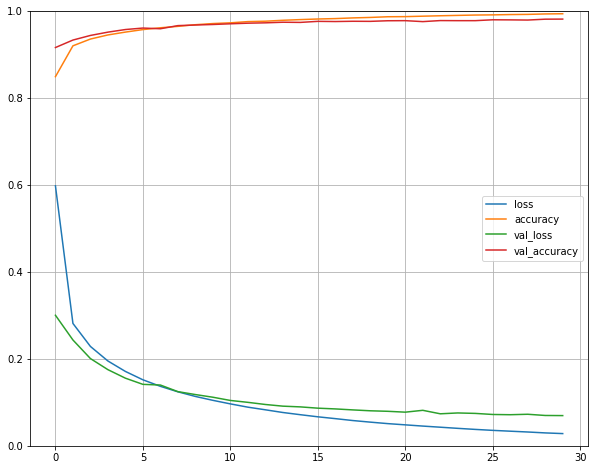

In [39]:
df_losses.plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Validation curve e training curve proximas -> baixo risco de overfitting

*O erro do dataset de validação é computado após o treinamento da epoch, enquanto do treino é durante, por isso a curva de validação parece performar melhor que a de treino 

Parametros que podem ser tunados:

- learning rate
- tentar outro optimizer
- numero de camadas, neurons por camadas, tipos de funções de ativação para cada hidden layer
- batch size (padrão 32), que é tunado no fit
- class_weight, caso o dataset seja muito assimetrico (para dar mais peso para classe pouco representada)

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 12.1442 - accuracy: 0.9774


[12.144227027893066, 0.977400004863739]

In [48]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [49]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [50]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)